**IMPLEMENT A SVM TO CLASSIFY IMAGES OF CATS AND DOGS FROM KAGGLE DATASET**

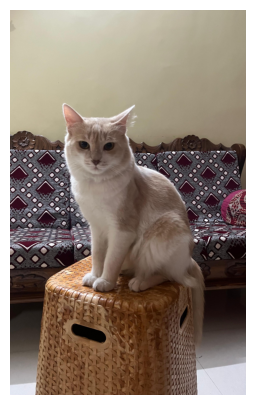

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from skimage.io import imread
from skimage.transform import resize
from sklearn.model_selection import train_test_split
import os

# Correct figure syntax
plt.figure(figsize=(10, 5))

# Correct file path
img1 = r"D:\ml prodigy infotech\task 2\IMG-20241125-WA0008.jpg"

# Check if the file exists
if os.path.exists(img1):
    img = imread(img1)
    plt.imshow(img)
    plt.axis("off")  # Hide axes
    plt.show()
else:
    print("File not found:", img1)


**converting image to matrix/vectors**

In [2]:
img_path = r"D:\ml prodigy infotech\task 2\IMG-20241125-WA0008.jpg"
img = imread(img_path)
img

array([[[198, 187, 169],
        [199, 188, 170],
        [198, 187, 169],
        ...,
        [172, 167, 148],
        [164, 162, 147],
        [155, 153, 140]],

       [[196, 185, 167],
        [198, 187, 169],
        [199, 188, 170],
        ...,
        [169, 164, 145],
        [163, 161, 146],
        [159, 157, 144]],

       [[194, 183, 165],
        [197, 186, 168],
        [199, 188, 170],
        ...,
        [164, 159, 140],
        [161, 159, 144],
        [160, 158, 145]],

       ...,

       [[232, 232, 244],
        [233, 233, 245],
        [235, 235, 247],
        ...,
        [220, 220, 230],
        [216, 217, 222],
        [212, 213, 218]],

       [[231, 231, 243],
        [232, 232, 244],
        [234, 234, 246],
        ...,
        [220, 220, 230],
        [215, 216, 221],
        [211, 212, 217]],

       [[230, 230, 242],
        [231, 231, 243],
        [233, 233, 245],
        ...,
        [222, 222, 232],
        [218, 219, 224],
        [217, 218, 223]]

In [3]:
img.shape

(4032, 2471, 3)

**resizing the matrix**

In [4]:
img_resize = resize(img,(15,15))
img_resize.shape

(15, 15, 3)

In [5]:
img_resize

array([[[0.80009267, 0.77073416, 0.68782891],
        [0.8219899 , 0.80407194, 0.72892734],
        [0.8314694 , 0.82197593, 0.75299258],
        [0.83551714, 0.82746237, 0.76192381],
        [0.82875557, 0.82176585, 0.75818491],
        [0.82089041, 0.81086649, 0.74830139],
        [0.80817964, 0.79327573, 0.72549506],
        [0.79383363, 0.77403401, 0.70130291],
        [0.77831041, 0.7534396 , 0.67607671],
        [0.75968207, 0.73357146, 0.65225607],
        [0.73451316, 0.7080594 , 0.62547077],
        [0.70815867, 0.68246455, 0.59783116],
        [0.69097885, 0.66585812, 0.57921585],
        [0.67338396, 0.64569545, 0.55755201],
        [0.64982114, 0.6192287 , 0.53029187]],

       [[0.80777887, 0.78296101, 0.68907889],
        [0.81224005, 0.79169827, 0.70026709],
        [0.81188944, 0.79478337, 0.70500728],
        [0.80696607, 0.79120777, 0.70357387],
        [0.79934111, 0.78274784, 0.69689807],
        [0.78982851, 0.7701397 , 0.68470325],
        [0.77555021, 0.7531027 ,

**flatten the matrix**

In [6]:
flatten_img = img_resize.flatten()
flatten_img

array([0.80009267, 0.77073416, 0.68782891, 0.8219899 , 0.80407194,
       0.72892734, 0.8314694 , 0.82197593, 0.75299258, 0.83551714,
       0.82746237, 0.76192381, 0.82875557, 0.82176585, 0.75818491,
       0.82089041, 0.81086649, 0.74830139, 0.80817964, 0.79327573,
       0.72549506, 0.79383363, 0.77403401, 0.70130291, 0.77831041,
       0.7534396 , 0.67607671, 0.75968207, 0.73357146, 0.65225607,
       0.73451316, 0.7080594 , 0.62547077, 0.70815867, 0.68246455,
       0.59783116, 0.69097885, 0.66585812, 0.57921585, 0.67338396,
       0.64569545, 0.55755201, 0.64982114, 0.6192287 , 0.53029187,
       0.80777887, 0.78296101, 0.68907889, 0.81224005, 0.79169827,
       0.70026709, 0.81188944, 0.79478337, 0.70500728, 0.80696607,
       0.79120777, 0.70357387, 0.79934111, 0.78274784, 0.69689807,
       0.78982851, 0.7701397 , 0.68470325, 0.77555021, 0.7531027 ,
       0.66575264, 0.75926351, 0.73497824, 0.64730382, 0.74113559,
       0.71540804, 0.62781628, 0.72145357, 0.69450128, 0.60755

In [7]:
flatten_img.shape

(675,)

**Reading the images from image folder and converting them into Matrix. Store it into list**

In [8]:
input_dir = r"D:\ml prodigy infotech\task 2\archive (8)\dogs_vs_cats\test"
categories = ['cats','dogs']
data = []
labels = []

for category_idx, category in enumerate(categories):
    for file in os.listdir(os.path.join(input_dir, category)):
        img_path = os.path.join(input_dir, category, file)
        print(img_path)
        img = imread(img_path)
        img = resize(img, (15,15))
        data.append(img.flatten())
        labels.append(category_idx)

D:\ml prodigy infotech\task 2\archive (8)\dogs_vs_cats\test\cats\cat.10.jpg
D:\ml prodigy infotech\task 2\archive (8)\dogs_vs_cats\test\cats\cat.10000.jpg
D:\ml prodigy infotech\task 2\archive (8)\dogs_vs_cats\test\cats\cat.10001.jpg
D:\ml prodigy infotech\task 2\archive (8)\dogs_vs_cats\test\cats\cat.10007.jpg
D:\ml prodigy infotech\task 2\archive (8)\dogs_vs_cats\test\cats\cat.10017.jpg
D:\ml prodigy infotech\task 2\archive (8)\dogs_vs_cats\test\cats\cat.10021.jpg
D:\ml prodigy infotech\task 2\archive (8)\dogs_vs_cats\test\cats\cat.10026.jpg
D:\ml prodigy infotech\task 2\archive (8)\dogs_vs_cats\test\cats\cat.10030.jpg
D:\ml prodigy infotech\task 2\archive (8)\dogs_vs_cats\test\cats\cat.10033.jpg
D:\ml prodigy infotech\task 2\archive (8)\dogs_vs_cats\test\cats\cat.10035.jpg
D:\ml prodigy infotech\task 2\archive (8)\dogs_vs_cats\test\cats\cat.10036.jpg
D:\ml prodigy infotech\task 2\archive (8)\dogs_vs_cats\test\cats\cat.10046.jpg
D:\ml prodigy infotech\task 2\archive (8)\dogs_vs_cats\

In [9]:
data[1]

array([0.03137255, 0.03137255, 0.03137255, 0.03322839, 0.03304947,
       0.03304017, 0.19157445, 0.17650159, 0.17605219, 0.44643111,
       0.41192391, 0.40663612, 0.12992159, 0.11964315, 0.10830666,
       0.20563987, 0.18105254, 0.15857104, 0.40147446, 0.36336429,
       0.3455929 , 0.08995426, 0.07843189, 0.0741605 , 0.05514937,
       0.03864967, 0.03669696, 0.08328781, 0.06228142, 0.03608543,
       0.16684838, 0.13334241, 0.05598888, 0.2746878 , 0.22540409,
       0.12397936, 0.31564693, 0.26256166, 0.16297219, 0.1768635 ,
       0.14790754, 0.09479782, 0.04286522, 0.04045497, 0.03652871,
       0.03137255, 0.03137255, 0.03137255, 0.03281934, 0.03261504,
       0.03260303, 0.18453078, 0.16376254, 0.16340428, 0.63334501,
       0.57233906, 0.56413664, 0.45008046, 0.41599922, 0.38228789,
       0.46935468, 0.42825648, 0.38944883, 0.42262964, 0.37907008,
       0.36436581, 0.07253642, 0.06339073, 0.06219005, 0.05104213,
       0.03881912, 0.03525724, 0.08857836, 0.06329493, 0.03745

In [10]:
labels[1]

0

**LIST OF MATRIX CONVERTED INTO NUMPY ARRAY**

In [12]:
data=np.asarray(data)
labels=np.asarray(labels)
data.shape


(5000, 675)

In [13]:
labels

array([0, 0, 0, ..., 1, 1, 1])

**splitting data into training and testing**

In [14]:
x_train,x_test,y_train,y_test=train_test_split(data,labels,shuffle=True,test_size=0.2,stratify=labels)

**building a svm model for classification**

In [15]:
from sklearn.svm import SVC
svm_model=SVC()

In [16]:
svm_model.fit(x_train,y_train)
svm_model

SVC()

In [17]:
y_pred=svm_model.predict(x_test)
y_pred

array([1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,

**evaluation of model**

In [18]:
from sklearn.metrics import accuracy_score
acc_score=accuracy_score(y_test,y_pred)
acc_score

0.651

In [23]:
from sklearn.model_selection import cross_val_score
cross_val_score=cross_val_score(svm_model,data,labels,cv=5)
cross_val_score

array([0.62 , 0.641, 0.65 , 0.654, 0.678])

In [24]:
mean_accuracy=cross_val_score.mean()
mean_accuracy

0.6486

In [25]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.66      0.61      0.64       500
           1       0.64      0.69      0.66       500

    accuracy                           0.65      1000
   macro avg       0.65      0.65      0.65      1000
weighted avg       0.65      0.65      0.65      1000

